In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from matplotlib.offsetbox import AnchoredText
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [4]:
df = pd.read_csv("opp-stops_state.csv")

In [5]:
# drop all NaN values
df.drop(columns = ['city', 'geography'], inplace = True)
df.dropna(inplace = True)

# add number of searches column
df['nb_searches'] = df.search_rate * df.stops_per_year


In [23]:
#Définir array des états bleus et rouges
red_states = ['SC', 'TX']
blue_states  = ['IL', 'CT', 'RI']

#Fonction pour trier les états en blue et red: 
def what_color (name): #retourne toujours none !
    if any(s == name for s in blue_states):
        return 'blue'
    elif any(s == name for s in red_states):
        return 'red'
    else:
        return 'none'
    
def sort_array_of_state(dataframe):
    colors = []
    for state in dataframe['state']:
        colors.append(what_color(state))
    return colors
    
#Trier les états de notre dataframe:
df['party'] = sort_array_of_state(df)


In [37]:
blue = df[df['party'].str.contains('blue')]
red = df[df['party'].str.contains('red')]
blue

,state,subgeography,subject_race,search_rate,stop_rate,hit_rate,inferred_threshold,stops_per_year,stop_rate_n,nb_searches,party
418,CT,Fairfield County,white,0.013487,0.065458,0.356108,0.223550,17189.76,160113.12,231.84,blue
419,CT,Fairfield County,black,0.029384,0.073116,0.315113,0.171864,5080.32,25650.72,149.28,blue
420,CT,Fairfield County,hispanic,0.020520,0.039236,0.257426,0.198470,4725.12,21654.72,96.96,blue
421,CT,Hartford County,white,0.012005,0.065458,0.319820,0.238114,17752.80,160113.12,213.12,blue
422,CT,Hartford County,black,0.036567,0.073116,0.303398,0.155822,5408.16,25650.72,197.76,blue
...,...,...,...,...,...,...,...,...,...,...,...
2475,RI,500,black,0.072370,0.124369,0.457045,0.160940,2412.60,7196.00,174.60,blue
2476,RI,500,hispanic,0.067899,0.044056,0.421182,0.152781,2391.80,6780.60,162.40,blue
2488,RI,900,white,0.016673,0.041327,0.396657,0.244227,7893.20,31961.60,131.60,blue
2489,RI,900,black,0.032466,0.124369,0.375000,0.211771,1429.20,7196.00,46.40,blue


In [42]:
blue_weighted_hit_rate_mean = (blue.hit_rate*blue.nb_searches / blue.nb_searches.sum()).mean()
red_weighted_hit_rate_mean = np.mean(red.hit_rate*red.nb_searches / red.nb_searches.sum())
blue_weighted_hit_rate_mean, red_weighted_hit_rate_mean, blue.hit_rate.mean()

(0.003133305164105254, 0.0007197400195211472, 0.3033774690616758)

In [24]:
a = df[df.state.str.contains('CT')].dropna().stops_per_year.sum() +df[df.state.str.contains('IL')].dropna().stops_per_year.sum() + df[df.state.str.contains('RI')].dropna().stops_per_year.sum()

In [25]:
b = df[df.state.str.contains('TX')].dropna().stops_per_year.sum() + df[df.state.str.contains('SC')].dropna().stops_per_year.sum()

In [26]:
a, b, a/b

(517674.6266666667, 2104964.397693118, 0.2459303479118217)

Wesh on a choisit Connecticut (55%), Illinois (55%), RI (54%), TX (52%), SC (55%)

In [27]:
# get dataframe for each blue state
df_ct = df[df.state.str.contains('CT')]
df_il = df[df.state.str.contains('IL')]
df_ri = df[df.state.str.contains('RI')]

In [28]:
# get dataframe for each red state
df_tx = df[df.state.str.contains('TX')]
df_sc = df[df.state.str.contains('SC')]
df_tx[df_tx.subgeography.str.contains('')]
df_total = pd

,state,subgeography,subject_race,search_rate,stop_rate,hit_rate,inferred_threshold,stops_per_year,stop_rate_n,nb_searches,party
2917,TX,Anderson County,white,0.009666,0.091078,0.357298,0.271570,7605.857143,1.070666e+06,73.516719,red
2918,TX,Anderson County,black,0.016948,0.067230,0.459893,0.308993,1793.000000,2.150716e+05,30.387076,red
2919,TX,Anderson County,hispanic,0.015861,0.069734,0.347107,0.214615,1248.571429,7.443300e+05,19.803007,red
2923,TX,Angelina County,white,0.010130,0.091078,0.478088,0.328352,8337.714286,1.070666e+06,84.462366,red
2924,TX,Angelina County,black,0.018994,0.067230,0.389671,0.341526,1882.142857,2.150716e+05,35.749637,red
...,...,...,...,...,...,...,...,...,...,...,...
3653,TX,Williamson County,black,0.025413,0.067230,0.494577,0.305252,3181.428571,2.150716e+05,80.851079,red
3654,TX,Williamson County,hispanic,0.024083,0.069734,0.322340,0.200787,6339.714286,7.443300e+05,152.682007,red
3661,TX,Wise County,white,0.015098,0.091078,0.451655,0.317677,16829.714286,1.070666e+06,254.101247,red
3662,TX,Wise County,black,0.043500,0.067230,0.489914,0.277676,1375.285714,2.150716e+05,59.825015,red


In [29]:
# make blue and red dataframe by concatenation
df_blue = pd.concat([df_ct, df_il, df_ri])
df_red = pd.concat([df_tx, df_sc])
df_blue.head()

,state,subgeography,subject_race,search_rate,stop_rate,hit_rate,inferred_threshold,stops_per_year,stop_rate_n,nb_searches,party
418,CT,Fairfield County,white,0.013487,0.065458,0.356108,0.223550,17189.76,160113.12,231.84,blue
419,CT,Fairfield County,black,0.029384,0.073116,0.315113,0.171864,5080.32,25650.72,149.28,blue
420,CT,Fairfield County,hispanic,0.020520,0.039236,0.257426,0.198470,4725.12,21654.72,96.96,blue
421,CT,Hartford County,white,0.012005,0.065458,0.319820,0.238114,17752.80,160113.12,213.12,blue
422,CT,Hartford County,black,0.036567,0.073116,0.303398,0.155822,5408.16,25650.72,197.76,blue


We ideally want all values by subject_race so we will manipulate the dataframe to obtain this

In [20]:
# pivot dataframes to organise them how we want
df_blue_pivot = df_blue.pivot(index= ['state', 'subgeography'], columns = ['subject_race'])
df_red_pivot = df_red.pivot(index= ['state', 'subgeography'], columns = ['subject_race'])
df_red_pivot

search_rate                     stop_rate            \
subject_race                  black  hispanic     white     black  hispanic   
state subgeography                                                            
SC    Aiken County         0.047768  0.097844  0.046344  0.198882  0.113592   
      Anderson County      0.036149  0.051656  0.025694  0.198882  0.113592   
      Beaufort County      0.030405  0.099145  0.030350  0.198882  0.113592   
      Berkeley County      0.030370  0.078427  0.037516  0.198882  0.113592   
      Calhoun County       0.036446  0.095064  0.027024  0.198882  0.113592   
...                             ...       ...       ...       ...       ...   
TX    Wharton County       0.027572  0.042115  0.010523  0.067230  0.069734   
      Wichita County       0.057150  0.043787  0.021745  0.067230  0.069734   
      Wilbarger County     0.023802  0.014195  0.006876  0.067230  0.069734   
      Williamson County    0.025413  0.024083  0.013453  0.067230  0.069734   
      Wise County          0.043500  0.026597  0.015098  0.067230  0.069734   

                                   hit_rate                      \
subject_race                white     black  hispanic     white   
state subgeography                                                
SC    Aiken County       0.152224  0.311993  0.171032  0.326098   
      Anderson County    0.152224  0.301578  0.173913  0.277738   
      Beaufort County    0.152224  0.291667  0.107190  0.177751   
      Berkeley County    0.152224  0.234327  0.096692  0.210503   
      Calhoun County     0.152224  0.423188  0.096154  0.453125   
...                           ...       ...       ...       ...   
TX    Wharton County     0.091078  0.548780  0.266531  0.537143   
      Wichita County     0.091078  0.606695  0.439252  0.563006   
      Wilbarger County   0.091078  0.533333  0.327273  0.551546   
      Williamson County  0.091078  0.494577  0.322340  0.396644   
      Wise County        0.091078  0.489914  0.412892  0.451655   

                        inferred_threshold  ... stops_per_year    stop_rate_n  \
subject_race                         black  ...          white          black   
state subgeography                          ...                                 
SC    Aiken County                0.093137  ...   14778.447761  262767.044776   
      Anderson County             0.131444  ...   29465.373134  262767.044776   
      Beaufort County             0.126066  ...    9760.656716  262767.044776   
      Berkeley County             0.128566  ...   10636.656716  262767.044776   
      Calhoun County              0.156707  ...    1696.656716  262767.044776   
...                                    ...  ...            ...            ...   
TX    Wharton County              0.320722  ...    2685.000000  215071.571429   
      Wichita County              0.310999  ...    6820.571429  215071.571429   
      Wilbarger County            0.323033  ...    4595.714286  215071.571429   
      Williamson County           0.305252  ...   15324.142857  215071.571429   
      Wise County                 0.277676  ...   16829.714286  215071.571429   

                                                     nb_searches              \
subject_race                  hispanic         white       black    hispanic   
state subgeography                                                             
SC    Aiken County        30374.149254  4.748885e+05  419.641791  116.238806   
      Anderson County     30374.149254  4.748885e+05  317.731343   65.910448   
      Beaufort County     30374.149254  4.748885e+05  137.552239  137.014925   
      Berkeley County     30374.149254  4.748885e+05  174.268657   70.388060   
      Calhoun County      30374.149254  4.748885e+05   61.791045    9.313433   
...                                ...           ...         ...         ...   
TX    Wharton County     744330.000000  1.070666e+06   26.638774  155.806466   
      Wichita County     744330.000000  1.0

In [261]:
# get a dataframe of the (blue and red) state averages for each rate
df_means = pd.concat([df_red_pivot.groupby('state').mean(),df_blue_pivot.groupby('state').mean()])
df_means.head()

search_rate                     stop_rate                      \
subject_race       black  hispanic     white     black  hispanic     white   
state                                                                        
SC              0.030568  0.071167  0.024488  0.198882  0.113592  0.152224   
TX              0.035692  0.028722  0.015904  0.067230  0.069734  0.091078   
CT              0.033347  0.032341  0.013481  0.073116  0.039236  0.065458   
IL              0.074547  0.063474  0.025202  0.035313  0.013365  0.026335   
RI              0.049148  0.047730  0.023725  0.124369  0.044056  0.041327   

              hit_rate                     inferred_threshold  ...            \
subject_race     black  hispanic     white              black  ...     white   
state                                                          ...             
SC            0.243430  0.136636  0.225252           0.123028  ...  0.136424   
TX            0.427774  0.343955  0.440072           0.283278  ...  0.293318   
CT            0.322624  0.319257  0.382655           0.173324  ...  0.250567   
IL            0.308515  0.197569  0.293780           0.098782  ...  0.176297   
RI            0.416950  0.376196  0.468122           0.190650  ...  0.265397   

             stops_per_year                               stop_rate_n  \
subject_race          black     hispanic         white          black   
state                                                                   
SC              6766.280597   847.113006  12803.754371  262767.044776   
TX              1674.540493  3739.653603   6889.914033  215071.571429   
CT              3353.448571  2867.051429  20085.051429   25650.720000   
IL              3158.141667  1427.266667   9954.400000   63789.333333   
RI              1703.400000  1603.250000   7378.250000    7196.000000   

                                          nb_searches                         
subject_race       hispanic         white       black   hispanic       white  
state                                                                         
SC             30374.149254  4.748885e+05  214.413646  57.860981  302.681450  
TX            744330.000000  1.070666e+06   53.128623  85.482830  107.717580  
CT             21654.720000  1.601131e+05  108.022857  87.394286  269.622857  
IL             28895.166667  2.095092e+05  233.608333  83.366667  242.616667  
RI              6780.600000  3.196160e+04   89.750000  82.100000  177.200000  

[5 rows x 21 columns]

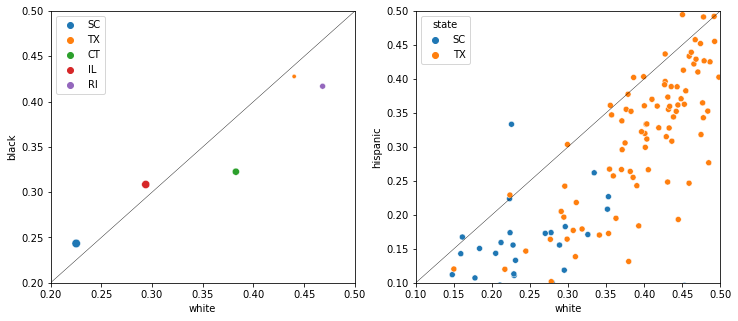

In [351]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (12,5))
ax1.plot(range(10),range(10), color = 'black', lw = 0.4)
ax1.set_xlim([0.2,0.5])  
ax1.set_ylim([0.2,0.5]) 
g = sns.scatterplot(data = df_means, x = df_means.hit_rate.white, y = df_means.hit_rate.black, hue = 'state', 
                size = (df_means.nb_searches.white + df_means.nb_searches.black), ax =ax1)
h,l = g.get_legend_handles_labels()
ax1.legend(h[0:5],l[0:5])

ax2.plot(range(10),range(10), color = 'black', lw = 0.4)
ax2.set_xlim([0.1,0.5]) 
ax2.set_ylim([0.1,0.5]) 
sns.scatterplot(data = df_red_pivot, x = df_red_pivot.hit_rate.white, y = df_red_pivot.hit_rate.hispanic, hue = 'state', ax =ax2)
plt.show(g)

In [303]:
df_blue_white = df_blue[df_blue.subject_race == 'white'].reset_index(drop = True)
df_blue_black = df_blue[df_blue.subject_race == 'black'].reset_index(drop = True)
df_blue_hispanic = df_blue[df_blue.subject_race == 'hispanic'].reset_index(drop = True)
df_blue_black.hit_rate = (df_blue_black.hit_rate / df_blue_white.hit_rate)
df_blue_hispanic.hit_rate = (df_blue_hispanic.hit_rate / df_blue_white.hit_rate)
df_blue_hispanic.head()
df_blue_pivot.hit_rate

,state,subgeography,subject_race,search_rate,stop_rate,hit_rate,inferred_threshold,stops_per_year,stop_rate_n,nb_searches
0,CT,Fairfield County,hispanic,0.020520,0.039236,0.722887,0.198470,4725.12,21654.72,96.96
1,CT,Hartford County,hispanic,0.036986,0.039236,0.921694,0.150746,3623.00,21654.72,134.00
2,CT,Litchfield County,hispanic,0.038982,0.039236,1.059899,0.177641,1257.00,21654.72,49.00
3,CT,New Haven County,hispanic,0.030105,0.039236,0.846523,0.160774,5006.40,21654.72,150.72
4,CT,New London County,hispanic,0.029246,0.039236,0.971233,0.174916,2215.68,21654.72,64.80


<AxesSubplot:xlabel='state', ylabel='hit_rate'>

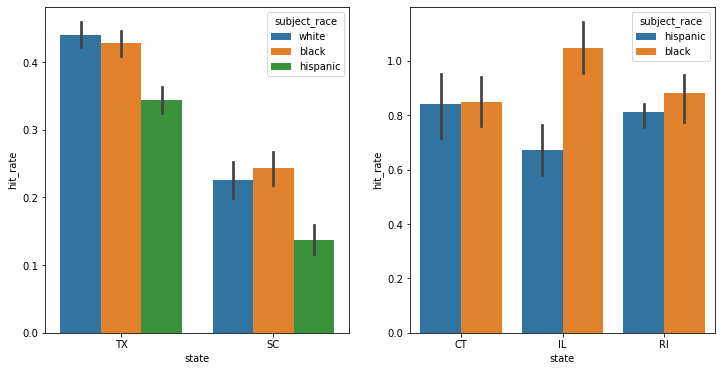

In [281]:
fig, ax = plt.subplots(1,2, figsize = (12,6))
sns.barplot(x = "state", y = "hit_rate", hue = "subject_race", data = df_red, ax = ax[0])
sns.barplot(x = "state", y = "hit_rate", hue = "subject_race", data = pd.concat([df_blue_hispanic,df_blue_black]), ax = ax[1])

In [15]:
def normalize(rates):
    
    return rates/np.max(rates.search_rate)

In [16]:
blue_means = df_blue.groupby(["state", "subject_race"]).mean()
# blue.drop(columns = ["search_rate", "stop_rate", "inferred_threshold", "stop_rate_n", "stops_per_year"], inplace = True)
# blue_means['normalized_threshold'] = blue_means.inferred_threshold.apply()
blue_means.unstack().hit_rate.apply(lambda x: x/np.max(x), axis=1)

subject_race,black,hispanic,white
state,,,
CT,0.843119,0.834322,1.000000
IL,1.000000,0.640385,0.952238
RI,0.890687,0.803628,1.000000


In [48]:
red_means = df_red.groupby(["state", "subject_race"]).mean()
# red_means.T.SC['relative_black'] = red_means.T.SC.black.hit_rate/red_means.T.SC.white.hit_rate

red_means.unstack().T.reset_index()
# red.drop(columns = ["search_rate", "stop_rate", "inferred_threshold", "stop_rate_n", "stops_per_year"], inplace = True)

state,level_0,subject_race,SC,TX
0,search_rate,black,0.030568,3.569188e-02
1,search_rate,hispanic,0.071167,2.872173e-02
2,search_rate,white,0.024488,1.590411e-02
3,stop_rate,black,0.198882,6.723041e-02
4,stop_rate,hispanic,0.113592,6.973359e-02
5,stop_rate,white,0.152224,9.107793e-02
6,hit_rate,black,0.243430,4.277739e-01
7,hit_rate,hispanic,0.136636,3.439552e-01
8,hit_rate,white,0.225252,4.400720e-01
9,inferred_threshold,black,0.123028,2.832781e-01


In [40]:
labels_blue = ['CT', 'RI', 'IL']
# df_black = blue_means[blue_means.subject_race == 'black']
# df_hispanic = blue_means[blue_means.subject_race == 'hispanic']
# df_white = blue_means[blue_means.subject_race == 'white']
blue_normalized_hit_rates = blue_means.unstack().hit_rate.apply(lambda x: x/np.max(x), axis=1)
red_means.unstack().hit_rate.apply(lambda x: x/np.max(x), axis=1)

# blue_normalized_inferred_threshold = blue_means.unstack().inferred_threshold.apply(lambda x: x/np.max(x), axis=1)
# red_normalized_inferred_threshold = red_means.unstack().inferred_threshold.apply(lambda x: x/np.max(x), axis=1)

# sns.barplot(x = "state", y = "hit rates", data = red_normalized_hit_rates)
# differences = [normalized_df.black, normalized_df.hispanic, normalized_df.white]
# # differences = [df_black.inferred_threshold, df_hispanic.inferred_threshold, df_white.inferred_threshold] 

# x = np.arange(len(labels_blue))  # the label locations
# width = 0.2  # the width of the bars

# fig, (ax1,ax2) = plt.subplots(1,2, figsize = (12,6))
# rects1 = ax1.bar(x - width, differences[0], width, label='black_means')
# rects2 = ax1.bar(x , differences[1], width, label='hispanic_means')
# rects3 = ax1.bar(x + width, differences[2], width, label='white_means')


# differences = [normalized_df.black, normalized_df.hispanic, normalized_df.white]

# ax1.set_ylabel('Rates')
# ax1.set_title('Blue states')
# ax1.set_xticks(x)
# ax1.set_xticklabels(labels_blue)
# ax1.legend()

# labels_red = ['SC', 'TX']
# x = np.arange(len(labels_red))  # the label locations
# width = 0.2  # the width of the bars

# rects1 = ax2.bar(x - width, differences[0], width, label='black_means')
# rects2 = ax2.bar(x , differences[1], width, label='hispanic_means')
# rects3 = ax2.bar(x + width, differences[2], width, label='white_means')

# # Add some text for labels, title and custom x-axis tick labels, etc.
# ax2.set_title('Red states')
# ax2.set_xticks(x)
# ax2.set_xticklabels(labels_red)
# ax2.legend()
# # ax.legend()

# fig.tight_layout()

# plt.show()

subject_race,black,hispanic,white
state,,,
SC,1.000000,0.561294,0.925326
TX,0.972054,0.781588,1.000000


In [ ]:
labels = ['SC', 'TX']
# df_black = red_means[red_means.subject_race == 'black']
# df_hispanic = red_means[red_means.subject_race == 'hispanic']
# df_white = red_means[red_means.subject_race == 'white']
# means = [df_black.inferred_threshold, df_hispanic.inferred_threshold, df_white.inferred_threshold] 
normalized_df = red_means.unstack().inferred_threshold.apply(lambda x: x/np.max(x), axis=1)
differences = [normalized_df.black, normalized_df.hispanic, normalized_df.white]

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, differences[0], width, label='black_means')
rects2 = ax.bar(x , differences[1], width, label='hispanic_means')
rects3 = ax.bar(x + width, differences[2], width, label='white_means')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by state and race')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

In [110]:
hit_rate = pd.concat([red, blue])
hit_rate.reset_index(inplace = True)

In [118]:
hit_rate[hit_rate.subject_race == 'black'].drop(columns = "subject_race")

,state,hit_rate
0,SC,0.243430
3,TX,0.427774
6,CT,0.322624
9,IL,0.308515
12,RI,0.416950
